In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import pandas as pd

from utils.dataloader  import FaceDataset, preprocess, postprocess
from utils.learning import testing, training
from utils.utils_data import train_validation_test_split
from utils.visiualisation import display_graph_learning
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from models.resnet import ResnetCustomModel
from tqdm import tqdm

torch.cuda.empty_cache()

In [3]:
faceDataset_range04 = FaceDataset(preprocess(), is_group_network=True, group_rng=0)
print(f'Taille du dataset: {len(faceDataset_range04)}')

Taille du dataset: 43266


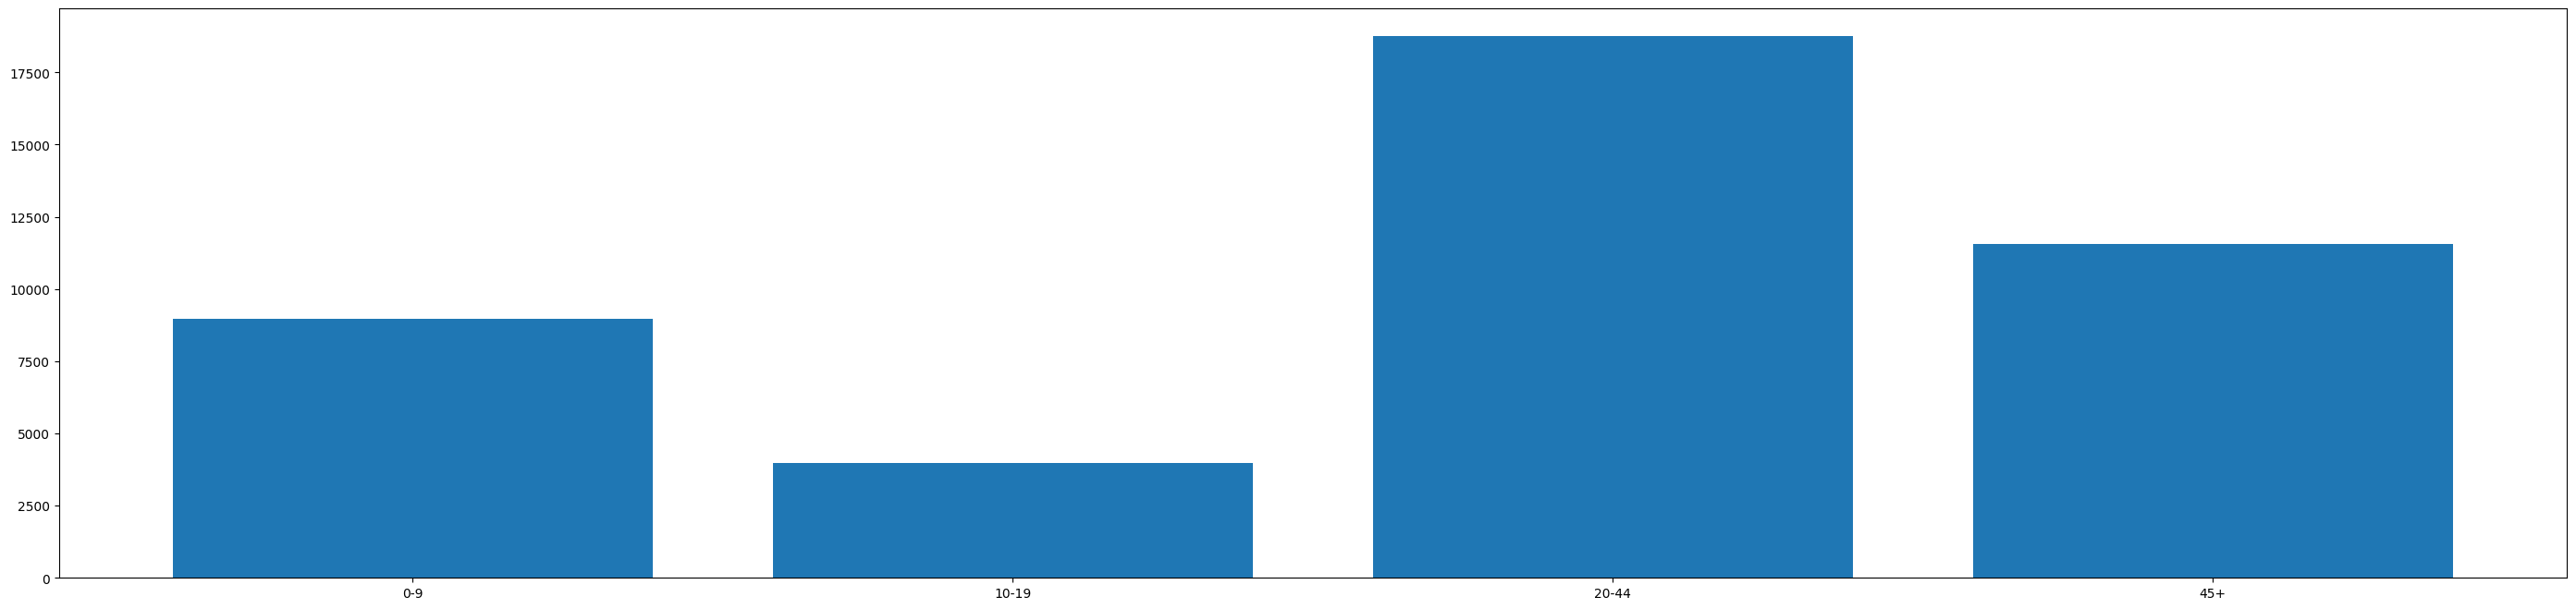

In [4]:
img_by_age_range = faceDataset_range04.img_labels.groupby(['age_range_extended'])['age_range_extended']
df = img_by_age_range.count()

label_names = faceDataset_range04.get_all_age_range_extended()

fig, ax = plt.subplots(figsize=(35, 8))
bar_container = ax.bar(label_names.values(), df.values)

## Entrainement

Nous allons entrainer notre un model pour chaque groupe d'age

## Classifier 0 - 9

In [6]:
faceDataset_range09 = FaceDataset(preprocess(), is_group_network=True, group_rng=0)

#### Entrainement

In [ ]:
# make training
# save model

#### Test

In [ ]:
# make test

#### Display result and discussion  

In [ ]:
# visualization of result and discution

## Classifier 10 - 19

In [7]:
faceDataset_range1019 = FaceDataset(preprocess(), is_group_network=True, group_rng=1)

#### Entrainement

In [ ]:
# make training
# save model

#### Test

In [ ]:
# make test

#### Display result and discussion  

In [8]:
# visualization of result and discution

## Classifier 20 - 44

In [ ]:
faceDataset_range2044 = FaceDataset(preprocess(), is_group_network=True, group_rng=2)

#### Entrainement

In [ ]:
# make training
# save model

#### Test

In [9]:
# make test

#### Display result and discussion  

In [10]:
# visualization of result and discution

## Classifier 45+

In [ ]:
faceDataset_range45 = FaceDataset(preprocess(), is_group_network=True, group_rng=3)

#### Entrainement

In [ ]:
# make training
# save model

#### Test

In [ ]:
# make test

#### Display result and discussion  

In [ ]:
# visualization of result and discution